In [16]:
#Cargar librerías:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [19]:
#Cargar base de datos:
df = pd.read_csv(r'C:\Users\Usuario\Desktop\CienciadeDatos\nba_logreg2.csv', sep = ";")
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [20]:
#Información de los datos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

In [21]:
#Descripción de los datos:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


Análisis de Componentes Principales

In [22]:
#Selección de variables continuas
data = df[['MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA','3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TOV']]

In [23]:
#Estandarizar dataset

#Instanciar y aplicar fit_transfor a dataset
data_std =  StandardScaler().fit_transform(data)

# Generar dataframe desde los datos estandarizados, agregando nombre de columnas
df_data_std = pd.DataFrame(data_std, columns=data.columns)

In [24]:
df_data_std.iloc[:,:-1].apply(lambda x: np.mean(x).round(2))

MIN        0.0
PTS        0.0
FGM       -0.0
FGA       -0.0
FG%        0.0
3P Made    0.0
3PA        0.0
3P%        0.0
FTM       -0.0
FTA        0.0
FT%        0.0
OREB       0.0
DREB      -0.0
REB       -0.0
AST       -0.0
STL        0.0
BLK       -0.0
dtype: float64

In [25]:
df_data_std.iloc[:,:-1].apply(lambda x: np.var(x))

MIN        1.0
PTS        1.0
FGM        1.0
FGA        1.0
FG%        1.0
3P Made    1.0
3PA        1.0
3P%        1.0
FTM        1.0
FTA        1.0
FT%        1.0
OREB       1.0
DREB       1.0
REB        1.0
AST        1.0
STL        1.0
BLK        1.0
dtype: float64

In [26]:
#Obtener matriz de correlación del DataFrame Standarizado
matriz_corr = df_data_std.corr(method="pearson")
matriz_corr

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
MIN,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431
PTS,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272
FGM,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343
FGA,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952
FG%,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429
3P Made,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015
3PA,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496
3P%,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277
FTM,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762
FTA,0.779813,0.880826,0.840667,0.805507,0.306360,0.093059,0.105784,-0.032333,0.980626,1.000000,0.110846,0.655408,0.704195,0.714267,0.427141,0.579737,0.473501,0.798856


In [27]:
#Prueba de Bartlet
import math as m
import scipy.stats as stats

#Se procede a calcular los valores para el estadistico chi-cuadro
n = len(df_data_std)
p = df_data_std.shape[1]
R = np.linalg.det(matriz_corr)

print(f'Cantidad de filas {n}')
print(f'Cantidad de columnas {p}')
print(f'Determinante de la matriz de correlación {R}')

Cantidad de filas 1329
Cantidad de columnas 18
Determinante de la matriz de correlación 3.155301851122135e-18


In [28]:
#Valor estadistico chi2
chi2 = -(n-1-((2*p+5)/6))*m.log(R)
print(f'Valor estadistico chi2: {chi2}')

Valor estadistico chi2: 53239.64440009402


In [29]:
#Grados de libertad
gdl = (p*(p-1))/2
print(f'Grados de libertad: {gdl}')

Grados de libertad: 153.0


In [30]:
#P-value calculado
pvalue = stats.chi2.pdf(chi2, gdl)
print(f'P-value: {pvalue:}')

P-value: 0.0


In [ ]:
#Debido al valor muy alto del estadístico Chi2, el p-value converge a 0. 
#Dicho esto se puede rechazar la hipótesis nula al ser menor 0.05, lo cual indica que las variables sí están
#correlacionadas y se puede aplicar PCA.

In [31]:
#Matriz de covarianza
matriz_cov = np.cov(df_data_std.T)
matriz_cov

array([[ 1.00075301,  0.91243298,  0.90354353,  0.91087956,  0.20849747,
         0.38976694,  0.40311684,  0.16612155,  0.79168451,  0.78039974,
         0.23633787,  0.57408716,  0.74762803,  0.71138844,  0.6296208 ,
         0.75762024,  0.40131247,  0.82705322],
       [ 0.91243298,  1.00075301,  0.99162006,  0.98041398,  0.26178409,
         0.34554933,  0.35546507,  0.15118559,  0.89692032,  0.88148878,
         0.25459516,  0.5768548 ,  0.69708465,  0.67951286,  0.55197618,
         0.67544505,  0.39078984,  0.85091251],
       [ 0.90354353,  0.99162006,  1.00075301,  0.98085506,  0.29733653,
         0.28817283,  0.29812184,  0.11958326,  0.84878505,  0.8412998 ,
         0.21958828,  0.5979175 ,  0.70572244,  0.69319964,  0.53266184,
         0.66295543,  0.40104558,  0.83497134],
       [ 0.91087956,  0.98041398,  0.98085506,  1.00075301,  0.13591733,
         0.38915282,  0.41236314,  0.19730809,  0.8268661 ,  0.80611318,
         0.26460448,  0.50592816,  0.64323551,  0.616

In [32]:
#Autovalores y autovectores
autovalores, autovector = np.linalg.eig(matriz_corr)
autovalores

array([9.17575683e+00, 3.89503599e+00, 1.21709332e+00, 8.45684220e-01,
       6.42252621e-01, 5.35558847e-01, 5.01499523e-01, 3.98050528e-01,
       2.61785818e-01, 2.32801087e-01, 1.10114420e-01, 1.00039556e-01,
       5.67059160e-02, 1.47281503e-02, 7.68631780e-03, 4.67018240e-03,
       1.68648038e-04, 3.68024308e-04])

In [33]:
#Varianza de capturada desde la matriz de autovalores
autovector

array([[ 3.13278294e-01,  6.89005241e-02,  3.42962173e-02,
         6.35705140e-02, -3.50730597e-02, -1.52410421e-01,
         8.16891319e-02,  1.11712782e-01, -9.92039193e-02,
         3.96034233e-02, -1.96487785e-01, -2.32725074e-01,
        -8.60023255e-01, -1.47369488e-02,  1.28691792e-02,
        -6.37918162e-02,  2.41046150e-03, -1.95288451e-03],
       [ 3.19636722e-01,  5.22807441e-02, -1.86584203e-03,
        -7.27308533e-02, -4.98696037e-02,  2.22925814e-01,
        -4.28041903e-02,  1.22728725e-02, -2.11694274e-01,
         1.27847654e-01, -3.20422708e-02, -5.49726563e-02,
         1.55891337e-01, -1.27778427e-01, -6.23121531e-02,
        -3.31998706e-01,  7.83841641e-01, -3.59002313e-02],
       [ 3.15448384e-01,  2.74587527e-02, -1.43386532e-02,
        -5.46762156e-02, -8.36022834e-02,  1.76973463e-01,
        -5.85180820e-02,  6.26602964e-02, -4.13054784e-01,
         1.88398523e-01, -2.29223167e-02, -3.57546582e-02,
         1.95637899e-01, -1.13838853e-01,  9.93906277e

In [34]:
autovalores.sum()

np.float64(18.000000000000018)

In [35]:
#Porcentaje de varianza explicada por todas las componentes
pct_varianza_explicada = autovalores/sum(autovalores)
pct_varianza_explicada

array([5.09764268e-01, 2.16390888e-01, 6.76162957e-02, 4.69824567e-02,
       3.56807012e-02, 2.97532693e-02, 2.78610846e-02, 2.21139182e-02,
       1.45436565e-02, 1.29333937e-02, 6.11746775e-03, 5.55775309e-03,
       3.15032866e-03, 8.18230572e-04, 4.27017656e-04, 2.59454578e-04,
       9.36933546e-06, 2.04457949e-05])

In [36]:
#Selección del numero de componentes (Kaiser)
autovalores_kaiser = autovalores[autovalores >= 0.8]
autovalores_kaiser

array([9.17575683, 3.89503599, 1.21709332, 0.84568422])

In [37]:
#Porcentaje de varianza explicada de las componentes elegidas
varianza_explicada=[]
varianza_explicada_acum =[]

#Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores_kaiser:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


#Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores_kaiser),len(autovalores_kaiser)))


#Visualizar matriz
matriz_var_expl

,pct_var_expl,pct_var_expl_acum
1.0,50.976427,50.976427
2.0,21.639089,72.615516
3.0,6.761630,79.377145
4.0,4.698246,84.075391


In [38]:
df_pct_varianza_explicada = pd.DataFrame(sorted(pct_varianza_explicada, reverse = True), index = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']).T

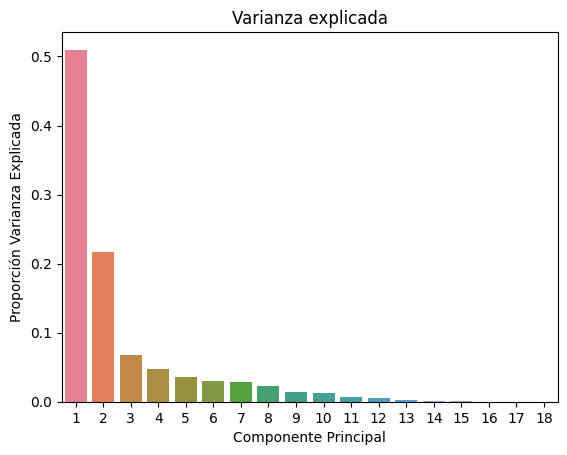

In [39]:
#Gráfico de varianza explicada
sns.barplot(df_pct_varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Proporción Varianza Explicada')
plt.title('Varianza explicada')
plt.show()

In [40]:
from sklearn.decomposition import PCA

In [41]:
#Autovalores e índice KMO
autovalores = np.linalg.eigvals(np.corrcoef(df_data_std.T))

print(f'Los autovalores son los siguientes: {autovalores}')

#Filtro límite KMO
autovalores_kaiser = autovalores[autovalores>=0.8]

#Cantidad autovalores
cantidad_autovalores_kaiser = len(autovalores_kaiser)
print('\n')
print(f'La cantidad de componentes a utilizar asciende a {cantidad_autovalores_kaiser}')

Los autovalores son los siguientes: [9.17575683e+00 3.89503599e+00 1.21709332e+00 8.45684220e-01
 6.42252621e-01 5.35558847e-01 5.01499523e-01 3.98050528e-01
 2.61785818e-01 2.32801087e-01 1.10114420e-01 1.00039556e-01
 5.67059160e-02 1.47281503e-02 7.68631780e-03 4.67018240e-03
 1.68648038e-04 3.68024308e-04]


La cantidad de componentes a utilizar asciende a 4


In [42]:
#PCA semilla 2021
pca = PCA(n_components=4, random_state=2021)

In [43]:
#Filt Transfor a dataset normalizado
pca_2 = pca.fit_transform(data_std)

In [44]:
#DataFrame de las componentes calculadas
columnas = ['CP1','CP2','CP3','CP 4']
df_pca_2 = pd.DataFrame(pca_2 , columns=columnas)

#Data reducida en sus dimensionalidades
df_pca_2.head(3)

,CP1,CP2,CP3,CP 4
0,1.062631,1.199189,1.162150,-0.457439
1,1.707552,2.969647,-0.160182,-0.710907
2,-1.154807,0.813473,0.719780,-0.397721


In [45]:
#Matriz correlación Pearson
df_pca_2.corr(method = 'pearson').round(14)

,CP1,CP2,CP3,CP 4
CP1,1.0,-0.0,0.0,0.0
CP2,-0.0,1.0,0.0,-0.0
CP3,0.0,0.0,1.0,-0.0
CP 4,0.0,-0.0,-0.0,1.0


In [46]:
#Cálculo de las componentes principales para cada valor
puntajes = np.dot(df_data_std, pca.components_.T)

In [47]:
#Valor de las componentes principales para cada observación
df_puntajes = pd.DataFrame(puntajes, columns=['CP 1', 'CP 2', 'CP 3','CP 4'] ,index = data.index)
df_puntajes

,CP 1,CP 2,CP 3,CP 4
0,1.062631,1.199189,1.162150,-0.457439
1,1.707552,2.969647,-0.160182,-0.710907
2,-1.154807,0.813473,0.719780,-0.397721
3,-1.391106,0.118060,-0.339679,0.069473
4,-1.535178,-1.868563,-0.263959,0.436073
...,...,...,...,...
1324,-1.587913,0.409692,-1.375239,0.696483
1325,-1.682535,1.289793,-1.280900,0.189872
1326,-0.896042,-2.499702,0.132467,0.189792
1327,-2.110513,-0.000523,-1.375668,-0.462803


In [49]:
#DataFrame con columna binaria "Target"
df_puntajes['Target'] = df['TARGET_5Yrs']
df_puntajes.head(5)

,CP 1,CP 2,CP 3,CP 4,Target
0,1.062631,1.199189,1.162150,-0.457439,0.0
1,1.707552,2.969647,-0.160182,-0.710907,0.0
2,-1.154807,0.813473,0.719780,-0.397721,0.0
3,-1.391106,0.118060,-0.339679,0.069473,1.0
4,-1.535178,-1.868563,-0.263959,0.436073,1.0
